# Импортирование библиотек

In [1]:
import os
import docx
import re
import pandas as pd 
import numpy as np



import matplotlib.pyplot as plt 
import seaborn as sns

import spacy

from sklearn import metrics
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer as snow



C:\Prog\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Prog\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Prog\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

# Переход в необходимую территорю

In [15]:
def get_list_doc(folder):
    paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('docx') and not file.startswith('~'):
                paths.append(os.path.join(file))
    return paths

In [16]:
path =get_list_doc(r"C:\Users\79219\Desktop\digital_xakaton\document")

In [17]:
len(path)

165

# Словарь по таргетам 

In [18]:
def get_all_paragrah_target(list_doc):
    str_falsee = "{"
    dict_non_targe = {}
    dict_text_target = {}
    count = 0
    for doc in list_doc:
        print(count+1)
        doc = docx.Document(doc)
        for paragraph in doc.paragraphs:
            if  str_falsee not in  paragraph.text:
                    dict_non_targe[paragraph.text] = 'nan'
            for str_ in range(len(paragraph.text)):
                if paragraph.text[str_] == '{':
                    star_ = str_
                if paragraph.text[str_] == '}':
                    end_ = str_
                    range_ = end_ - star_
                    string_text_target = paragraph.text[end_+1:-end_-1]
                    target = paragraph.text[star_+1:end_]
                    dict_text_target[string_text_target] = target
                
        count +=1


    return dict_text_target,dict_non_targe

In [19]:
%%time
dict_text_target,dict_nan_target  = get_all_paragrah_target(path)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
CPU times: total: 5min 26s
Wall time: 5min 28s


In [21]:
print(len(dict_nan_target))


5018


In [22]:
print(len(dict_text_target))

16272


In [23]:
len(dict_nan_target) + len(dict_text_target)

21290

# Создание Df

In [24]:
df_target = pd.DataFrame(list(dict_text_target.items()),
                   columns=['text', 'target'])

In [25]:
df_target

,text,target
0,"Настоящие Правила устанавливают цели, условия ...",2
1,,18
2,Сведения о субсидии размещаются на едином порт...,7
3,"Понятия, используемые в настоящих Правилах, оз...",1
4,"""вознаграждение"" - процентные отчисления, выпл...",1
...,...,...
16267,"Ответственность за нарушение условий, цели и п...",38
16268,возврат средств субсидии в федеральный бюджет ...,38
16269,"штрафные санкции, рассчитываемые в соответстви...",38
16270,"В случае если требование, указанное в настоящ...",38


In [26]:
raw = df_target[df_target['target'] == '']

In [27]:
raw.index

Int64Index([11379], dtype='int64')

In [28]:
df_target.drop(labels = [11379],axis = 0, inplace = True)

In [29]:
df_non_target = pd.DataFrame(list(dict_nan_target.items()),
                   columns=['text', 'target'])

In [30]:
df_non_target.target.value_counts()

nan    5018
Name: target, dtype: int64

# Слияние Df

In [31]:
df_append = df_non_target.append(df_target, ignore_index=True)

<ipython-input-31-ca48f2f8f6ec>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_non_target.append(df_target, ignore_index=True)


In [34]:
df_append = df_append.sample(frac=1)

In [35]:
df_append

,text,target
16150,в целях реализации соци,2
20773,{38}на основании требования Министерства эконо...,38
16530,Организация в 5-дневный срок со дня получения ...,36
9982,"{38} Министерство цифрового развития, связи и...",38
790,некоммерческой организации,nan
...,...,...
20814,"описание проекта, содержащее в том числе сведе...",19
21092,"значения результата предоставления субсидии, с...",27
14065,специальный тариф применяется для расчета стои...,35
18675,"Управляющая компания при заключении договоров,...",22


In [22]:
df_append['target'].value_counts()[:].sum()

21289

# Сохранение Df

In [2]:
df_append.to_csv(r'C:\Users\79219\Desktop\digital_xakaton\data.csv', index=False)

NameError: name 'df_append' is not defined

In [36]:
df_test = pd.read_csv(r'C:\Users\79219\Desktop\digital_xakaton\data.csv')

In [37]:
df_test

,text,target
0,"Отчетность об осуществлении расходов, источни...",36
1,кредитный договор (соглашение) предусматривае...,24
2,"Отчетность, указанная в и настоящих Правил, ...",36
3,Основаниями для отклонения Министерством экон...,17
4,"В случае если значение выражения более 1, его...",22
...,...,...
21284,"информация, содержащаяся в документах, указанн...",17
21285,"значения результата предоставления субсидии, ...",24
21286,"значение результатов предоставления субсидии,...",27
21287,обязанность организации направлять сведения о ...,24


# Анализ Df 

In [139]:
df_append = df_test.copy()

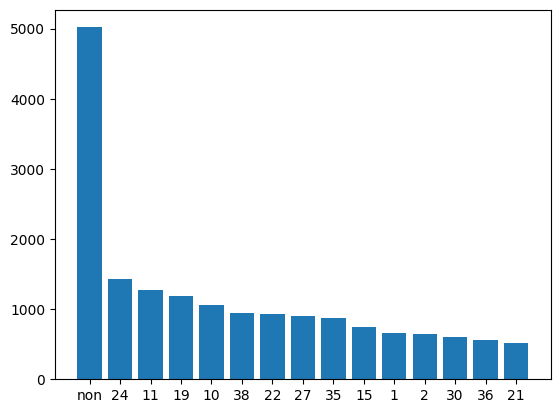

In [151]:
data = df_append.target.value_counts()
list_x = data.index
list_y = data.values
plt.bar(list_x[:15],list_y[:15])
plt.show()


In [230]:
df_append['target'].unique()


array(['36', '24', '17', '22', '1', 'non', '30', '32', '2', '10', '11',
       '20', '38', '35', '19', '21', '13', '27', '15', '8', '18', '7',
       '16', '3', '12', '4', '31', '37', '5', '6', '25', '26', '9', '29',
       '14', '28', '34', '39', '33', '23'], dtype=object)

In [149]:
x = df_append.target.value_counts()
x.values

array([5018, 1432, 1266, 1183, 1056,  942,  927,  909,  880,  740,  656,
        645,  602,  556,  523,  438,  329,  312,  291,  263,  233,  227,
        209,  202,  175,  151,  144,  114,  109,  105,  102,   95,   85,
         80,   72,   62,   46,   41,   38,   31], dtype=int64)

In [43]:
len(df_append.target.unique())

40

In [44]:
df_append.isnull().sum()

text      2
target    0
dtype: int64

In [45]:
df_append.fillna(0)

,text,target
0,"Отчетность об осуществлении расходов, источни...",36
1,кредитный договор (соглашение) предусматривае...,24
2,"Отчетность, указанная в и настоящих Правил, ...",36
3,Основаниями для отклонения Министерством экон...,17
4,"В случае если значение выражения более 1, его...",22
...,...,...
21284,"информация, содержащаяся в документах, указанн...",17
21285,"значения результата предоставления субсидии, ...",24
21286,"значение результатов предоставления субсидии,...",27
21287,обязанность организации направлять сведения о ...,24


In [46]:
df_append.isnull().sum()

text      2
target    0
dtype: int64

In [47]:
df_append.text.duplicated().sum()

24

# Функции для предобработки 

In [48]:
stop_words = set(stopwords.words('russian'))
nlp = spacy.load('ru_core_news_lg')
stemmer = snow('russian')
text_cleaning_re = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"


In [49]:
def clear_text(text):
    tokens = []
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    text = re.sub(r'\s+', ' ', text)
    for token in text.split():
        if token not in stop_words:
            token = "".join(c for c in token if token.isalnum())
            if len(token) != 2:
                tokens.append(token)
    return " ".join(tokens)

def pre_process(text):
    tokens = []
    for token in text.split():
        tokens.append(stemmer.stem(token))
    return " ".join(tokens)


def lemm_text_test(doc):
    tokens = []
    sentense = nlp(doc)
    for token in sentense:
        tokens.append(token.lemma_)
        
    return " ".join(tokens)

In [50]:
%%time
texts_ = df_append.text.apply(lambda x: clear_text(x))

CPU times: total: 1.22 s
Wall time: 1.22 s


In [51]:
%%time
texts_stemm = texts_.apply(lambda x: pre_process(x))

CPU times: total: 18.2 s
Wall time: 18.2 s


# TFiDF

In [152]:
tfidf=TfidfVectorizer(max_features=2400,ngram_range=(1,3),min_df=5,
                      stop_words=stop_words)

# Создание X , Y

In [126]:
X = texts_stemm
y = df_append.target.values

In [127]:
X[:2].values.tolist()

['отчетн осуществлен расход источник финансов обеспечен котор явля субсид состоян е числ месяц след отчетн период представля организац министерств цифров развит связ массов коммуникац российск федерац ежеквартальн поздн числ месяц след отчетн квартал ежегодн поздн числ месяц след отчетн период соответств соглашен',
 'кредитн договор соглашен предусматрива получен заемщик кредит льготн процентн ставк рассчита размер разниц процентн ставк кредитн договор учет субсидирован ставк субсидирован']

In [128]:
X.shape

(21289,)

In [129]:
y.shape

(21289,)

In [130]:
X_test = tfidf.fit_transform(X)

# разделение выборки

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=56)

In [132]:
X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

# Первая модель ML

In [133]:
LR = LogisticRegression( random_state=64, solver='lbfgs',
                        max_iter=10000, n_jobs=-1)


In [98]:
bb=BernoulliNB(alpha=0.5)


In [99]:
def train(model):
    model.fit(X_train_vector,y_train)
    y_predict=model.predict(X_test_vector)
    model_info = model
    report = classification_report(y_test,y_predict)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))
    return model_info, report

In [100]:
X_train_vector

<13837x2200 sparse matrix of type '<class 'numpy.float64'>'
	with 353754 stored elements in Compressed Sparse Row format>

In [101]:
%%time
train(bb)

BernoulliNB(alpha=0.5)
[[ 102    2    0 ...    0    0   62]
 [   2  211    4 ...    1    1   37]
 [  31    4  246 ...    0    0   60]
 ...
 [   1    2    0 ...    5    1    4]
 [   0    3    0 ...    1    0    3]
 [  41   15    7 ...    3    0 1428]]
              precision    recall  f1-score   support

           1       0.30      0.44      0.36       231
          10       0.63      0.58      0.60       365
          11       0.73      0.55      0.63       446
          12       0.25      0.09      0.13       164
          13       0.25      0.20      0.22        89
          14       0.00      0.00      0.00        22
          15       0.32      0.30      0.31       253
          16       0.29      0.38      0.33        76
          17       0.33      0.56      0.41       100
          18       0.30      0.50      0.38        38
          19       0.69      0.33      0.45       403
           2       0.47      0.41      0.44       219
          20       0.28      0.46      0.35   

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F

(BernoulliNB(alpha=0.5),
 '              precision    recall  f1-score   support\n\n           1       0.30      0.44      0.36       231\n          10       0.63      0.58      0.60       365\n          11       0.73      0.55      0.63       446\n          12       0.25      0.09      0.13       164\n          13       0.25      0.20      0.22        89\n          14       0.00      0.00      0.00        22\n          15       0.32      0.30      0.31       253\n          16       0.29      0.38      0.33        76\n          17       0.33      0.56      0.41       100\n          18       0.30      0.50      0.38        38\n          19       0.69      0.33      0.45       403\n           2       0.47      0.41      0.44       219\n          20       0.28      0.46      0.35       124\n          21       0.66      0.65      0.66       198\n          22       0.39      0.49      0.44       295\n          23       0.50      0.17      0.26        23\n          24       0.55      0.17   

In [102]:
%%time
train(LR)

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=64)
[[  80    1    5 ...    0    0  100]
 [   0  241    5 ...    0    0   33]
 [  11    3  306 ...    0    0   61]
 ...
 [   0    6    0 ...    2    0    6]
 [   2    8    0 ...    0    0    1]
 [   8   15   14 ...    0    0 1573]]
              precision    recall  f1-score   support

           1       0.56      0.35      0.43       231
          10       0.62      0.66      0.64       365
          11       0.69      0.69      0.69       446
          12       0.56      0.12      0.19       164
          13       0.50      0.01      0.02        89
          14       0.00      0.00      0.00        22
          15       0.39      0.38      0.39       253
          16       0.56      0.32      0.40        76
          17       0.56      0.48      0.52       100
          18       0.48      0.26      0.34        38
          19       0.61      0.67      0.64       403
           2       0.70      0.48      0.57       219
      

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(LogisticRegression(max_iter=10000, n_jobs=-1, random_state=64),
 '              precision    recall  f1-score   support\n\n           1       0.56      0.35      0.43       231\n          10       0.62      0.66      0.64       365\n          11       0.69      0.69      0.69       446\n          12       0.56      0.12      0.19       164\n          13       0.50      0.01      0.02        89\n          14       0.00      0.00      0.00        22\n          15       0.39      0.38      0.39       253\n          16       0.56      0.32      0.40        76\n          17       0.56      0.48      0.52       100\n          18       0.48      0.26      0.34        38\n          19       0.61      0.67      0.64       403\n           2       0.70      0.48      0.57       219\n          20       0.49      0.43      0.46       124\n          21       0.75      0.67      0.71       198\n          22       0.50      0.58      0.54       295\n          23       0.00      0.00      0.00        

In [103]:
0.5915190552871712

0.5915190552871712

In [104]:
0.6029253891572732

0.6029253891572732

In [105]:
0.30515297906602257

0.30515297906602257

In [106]:
from sklearn.ensemble import RandomForestClassifier


In [107]:
classifier = RandomForestClassifier(n_estimators=2000, 
                                    random_state=0, n_jobs=-1)

In [88]:
%%time
train(classifier)

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=0)
[[ 112    1    2 ...    0    0   82]
 [   1  250    3 ...    1    0   24]
 [   6    3  295 ...    0    0   47]
 ...
 [   0    4    0 ...    3    1    5]
 [   0    7    0 ...    0    0    4]
 [  10   17   14 ...    1    0 1558]]
              precision    recall  f1-score   support

           1       0.70      0.48      0.57       231
          10       0.61      0.68      0.65       365
          11       0.71      0.66      0.68       446
          12       0.46      0.23      0.30       164
          13       0.24      0.09      0.13        89
          14       0.67      0.09      0.16        22
          15       0.45      0.45      0.45       253
          16       0.55      0.37      0.44        76
          17       0.57      0.54      0.55       100
          18       0.27      0.16      0.20        38
          19       0.59      0.66      0.63       403
           2       0.78      0.58      0.66       219


C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=0),
 '              precision    recall  f1-score   support\n\n           1       0.70      0.48      0.57       231\n          10       0.61      0.68      0.65       365\n          11       0.71      0.66      0.68       446\n          12       0.46      0.23      0.30       164\n          13       0.24      0.09      0.13        89\n          14       0.67      0.09      0.16        22\n          15       0.45      0.45      0.45       253\n          16       0.55      0.37      0.44        76\n          17       0.57      0.54      0.55       100\n          18       0.27      0.16      0.20        38\n          19       0.59      0.66      0.63       403\n           2       0.78      0.58      0.66       219\n          20       0.52      0.48      0.50       124\n          21       0.71      0.72      0.71       198\n          22       0.52      0.62      0.57       295\n          23       0.44      0.17      0.25  

In [108]:
0.6218464841653247

0.6218464841653247

In [109]:
0.6245303274288782

0.6245303274288782

In [110]:
0.620101986044015

0.620101986044015

In [111]:
%%time
model_, report = train(bb)


BernoulliNB(alpha=0.5)
[[ 102    2    0 ...    0    0   62]
 [   2  211    4 ...    1    1   37]
 [  31    4  246 ...    0    0   60]
 ...
 [   1    2    0 ...    5    1    4]
 [   0    3    0 ...    1    0    3]
 [  41   15    7 ...    3    0 1428]]
              precision    recall  f1-score   support

           1       0.30      0.44      0.36       231
          10       0.63      0.58      0.60       365
          11       0.73      0.55      0.63       446
          12       0.25      0.09      0.13       164
          13       0.25      0.20      0.22        89
          14       0.00      0.00      0.00        22
          15       0.32      0.30      0.31       253
          16       0.29      0.38      0.33        76
          17       0.33      0.56      0.41       100
          18       0.30      0.50      0.38        38
          19       0.69      0.33      0.45       403
           2       0.47      0.41      0.44       219
          20       0.28      0.46      0.35   

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F

In [112]:
report

'              precision    recall  f1-score   support\n\n           1       0.30      0.44      0.36       231\n          10       0.63      0.58      0.60       365\n          11       0.73      0.55      0.63       446\n          12       0.25      0.09      0.13       164\n          13       0.25      0.20      0.22        89\n          14       0.00      0.00      0.00        22\n          15       0.32      0.30      0.31       253\n          16       0.29      0.38      0.33        76\n          17       0.33      0.56      0.41       100\n          18       0.30      0.50      0.38        38\n          19       0.69      0.33      0.45       403\n           2       0.47      0.41      0.44       219\n          20       0.28      0.46      0.35       124\n          21       0.66      0.65      0.66       198\n          22       0.39      0.49      0.44       295\n          23       0.50      0.17      0.26        23\n          24       0.55      0.17      0.26       509\n       

In [113]:
0.2917337627482555

0.2917337627482555

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [134]:
model = LinearSVC(max_iter=1250,C=1)

In [135]:
model_, report =train(model)

LinearSVC(C=1, max_iter=1250)
[[ 147    3    4 ...    0    0   43]
 [   1  257    7 ...    2    0   16]
 [  13    6  318 ...    0    0   30]
 ...
 [   2    2    0 ...    5    2    3]
 [   2    4    0 ...    0    0    1]
 [  17   15   22 ...    2    0 1520]]
              precision    recall  f1-score   support

           1       0.62      0.64      0.63       231
          10       0.64      0.70      0.67       365
          11       0.70      0.71      0.71       446
          12       0.49      0.31      0.38       164
          13       0.31      0.16      0.21        89
          14       0.67      0.09      0.16        22
          15       0.47      0.47      0.47       253
          16       0.55      0.47      0.51        76
          17       0.60      0.56      0.58       100
          18       0.30      0.21      0.25        38
          19       0.63      0.72      0.67       403
           2       0.68      0.62      0.65       219
          20       0.49      0.46      

In [117]:
0.6289586688137413

0.6289586688137413

In [118]:
0.6511003757380569

0.6511003757380569

In [120]:
0.6454643048845947

0.6454643048845947

In [121]:
str_= print(report)

              precision    recall  f1-score   support

           1       0.54      0.47      0.50       231
          10       0.64      0.68      0.66       365
          11       0.70      0.70      0.70       446
          12       0.44      0.23      0.30       164
          13       0.42      0.12      0.19        89
          14       0.67      0.09      0.16        22
          15       0.43      0.43      0.43       253
          16       0.54      0.49      0.51        76
          17       0.57      0.52      0.54       100
          18       0.31      0.24      0.27        38
          19       0.62      0.71      0.66       403
           2       0.70      0.57      0.63       219
          20       0.50      0.48      0.49       124
          21       0.73      0.72      0.72       198
          22       0.54      0.61      0.58       295
          23       0.57      0.17      0.27        23
          24       0.52      0.48      0.50       509
          25       0.46    

# сохранение модели

In [278]:
import pickle

In [279]:
pkl_filename = r"LinearSVC_model_2700.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [280]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [281]:
score = pickle_model.score(X_test_vector, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 62.17 %


In [282]:
Ypredict = pickle_model.predict(X_test_vector)
Ypredict

array(['38', '30', '10', ..., 'non', '4', 'non'], dtype=object)

# Загрузка модели 

In [380]:
def get_model(path_model):
    with open(path_model, 'rb') as file:
        pickle_model = pickle.load(file)
    return pickle_model

In [381]:
path_model = r"model\LinearSVC_model_2700.pkl"
model = get_model(path_model)

# Загрузка и анализ документа 

In [382]:
def load_file(path_to_file):
    doc = docx.Document(path_to_file)
    all_paragraphs = doc.paragraphs
    list_text_doc = [par.text for par in all_paragraphs]
    len_doc_paragraph = len(all_paragraphs)
    return list_text_doc, len_doc_paragraph

In [383]:
path_document = r"C:\Users\79219\Desktop\digital_xakaton\document\Postanovlenie_Pravitelstva_Rossiyskoy_Federatsii_ot_04_03_2021__314.docx"


In [384]:
list_text_doc, len_paragraph = load_file(path_document)

In [385]:
len_paragraph

101

In [386]:
list_text_doc

['Документ предоставлен \n',
 '',
 'ПРАВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ',
 '',
 'ПОСТАНОВЛЕНИЕ',
 'от 4 марта 2021 г. N 314',
 '',
 'ОБ УТВЕРЖДЕНИИ ПРАВИЛ',
 'ПРЕДОСТАВЛЕНИЯ В 2021 ГОДУ ИЗ ФЕДЕРАЛЬНОГО БЮДЖЕТА',
 'СУБСИДИИ АВТОНОМНОЙ НЕКОММЕРЧЕСКОЙ ОРГАНИЗАЦИИ',
 '"ТВ-НОВОСТИ" НА ПОДДЕРЖАНИЕ, ОБНОВЛЕНИЕ И РАСШИРЕНИЕ',
 'МАТЕРИАЛЬНО-ТЕХНИЧЕСКОЙ БАЗЫ ТЕЛЕВИЗИОННО-ТЕХНИЧЕСКОГО',
 'КОМПЛЕКСА В Г. МОСКВЕ И О ПРИЗНАНИИ УТРАТИВШИМ СИЛУ',
 'ПОСТАНОВЛЕНИЯ ПРАВИТЕЛЬСТВА РОССИЙСКОЙ ФЕДЕРАЦИИ',
 'ОТ 19 ДЕКАБРЯ 2019 Г. N 1724',
 '',
 'Правительство Российской Федерации постановляет:',
 '1. Утвердить прилагаемые  предоставления в 2021 году из федерального бюджета субсидии автономной некоммерческой организации "ТВ-Новости" на поддержание, обновление и расширение материально-технической базы телевизионно-технического комплекса в г. Москве.',
 '2. Признать утратившим силу  Правительства Российской Федерации от 19 декабря 2019 г. N 1724 "Об утверждении Правил предоставления субсидии из федерального бюдже

In [387]:
def pandas_df_text(text_doc):
    df = pd.DataFrame(text_doc, columns=['text'])
    return df

In [388]:
df = pandas_df_text(list_text_doc)

# Обработка текста 

In [389]:
stop_words = set(stopwords.words('russian'))
stemmer = snow('russian')
text_cleaning_re = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

def clear_text(text):
    tokens = []
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    text = re.sub(r'\s+', ' ', text)
    for token in text.split():
        if token not in stop_words:
            token = "".join(c for c in token if token.isalnum())
            tokens.append(token)
    return " ".join(tokens)

def pre_process(text):
    tokens = []
    for token in text.split():
        tokens.append(stemmer.stem(token))
    return " ".join(tokens)


In [390]:
def preprocess_text(df_text_doc):
    texts_ = df_text_doc.text.apply(lambda x: clear_text(x))
    texts_stemm = texts_.apply(lambda x: pre_process(x))
    return  texts_stemm

In [391]:
clear_stem_text = preprocess_text(df)

# Создание TFiDF

In [392]:
tfidf_doc=TfidfVectorizer(max_features=2745,ngram_range=(1,4))

In [393]:
X = tfidf_doc.fit_transform(clear_stem_text)

In [394]:
X

<101x2745 sparse matrix of type '<class 'numpy.float64'>'
	with 4343 stored elements in Compressed Sparse Row format>

In [395]:
# Вердикт модели 

In [396]:
Ypredict = model.predict(X)
Ypredict = Ypredict.tolist()
Ypredict

['non',
 'non',
 '35',
 'non',
 'non',
 'non',
 'non',
 'non',
 '18',
 'non',
 'non',
 'non',
 'non',
 '19',
 'non',
 'non',
 '11',
 '11',
 '11',
 'non',
 'non',
 '20',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 'non',
 '18',
 'non',
 'non',
 'non',
 'non',
 'non',
 '12',
 'non',
 '10',
 '27',
 'non',
 '15',
 'non',
 'non',
 'non',
 '10',
 'non',
 '36',
 '10',
 '24',
 '11',
 'non',
 '10',
 '30',
 '11',
 '15',
 '35',
 '11',
 '11',
 '22',
 'non',
 '11',
 '22',
 '19',
 '11',
 'non',
 '12',
 '35',
 '11',
 '22',
 '35',
 '10',
 'non',
 'non',
 '11',
 '35',
 '11',
 'non',
 '35',
 'non',
 'non',
 'non',
 'non',
 '10',
 '13',
 'non',
 '10',
 '35',
 '38',
 '38',
 '35',
 '24',
 'non',
 'non',
 'non',
 'non']

In [403]:
range_ = [i for i in range(len(Ypredict))]

In [404]:
range_

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [409]:
dict_={}
for i in range_:
    dict_[i] = Ypredict[i]

In [410]:
dict_

{0: 'non',
 1: 'non',
 2: '35',
 3: 'non',
 4: 'non',
 5: 'non',
 6: 'non',
 7: 'non',
 8: '18',
 9: 'non',
 10: 'non',
 11: 'non',
 12: 'non',
 13: '19',
 14: 'non',
 15: 'non',
 16: '11',
 17: '11',
 18: '11',
 19: 'non',
 20: 'non',
 21: '20',
 22: 'non',
 23: 'non',
 24: 'non',
 25: 'non',
 26: 'non',
 27: 'non',
 28: 'non',
 29: 'non',
 30: 'non',
 31: 'non',
 32: 'non',
 33: 'non',
 34: 'non',
 35: '18',
 36: 'non',
 37: 'non',
 38: 'non',
 39: 'non',
 40: 'non',
 41: '12',
 42: 'non',
 43: '10',
 44: '27',
 45: 'non',
 46: '15',
 47: 'non',
 48: 'non',
 49: 'non',
 50: '10',
 51: 'non',
 52: '36',
 53: '10',
 54: '24',
 55: '11',
 56: 'non',
 57: '10',
 58: '30',
 59: '11',
 60: '15',
 61: '35',
 62: '11',
 63: '11',
 64: '22',
 65: 'non',
 66: '11',
 67: '22',
 68: '19',
 69: '11',
 70: 'non',
 71: '12',
 72: '35',
 73: '11',
 74: '22',
 75: '35',
 76: '10',
 77: 'non',
 78: 'non',
 79: '11',
 80: '35',
 81: '11',
 82: 'non',
 83: '35',
 84: 'non',
 85: 'non',
 86: 'non',
 87: 

In [397]:
class_ = [str(i) for i in range(1,41)]
class_[-1] = 'non'

def get_info_class_loss(Ypredict, class_):
    list_class = []
    for i in Ypredict:
        if i not in list_class:
            list_class.append(i)
    return sorted(list_class)
        

In [398]:
x = get_info_class_loss(Ypredict, class_)


In [400]:
from collections import Counter

In [402]:
def freq_class(Ypredict):
    cnt = Counter(Ypredict)
    return cnt.most_common()

[('non', 54),
 ('11', 12),
 ('35', 8),
 ('10', 7),
 ('22', 3),
 ('18', 2),
 ('19', 2),
 ('12', 2),
 ('15', 2),
 ('24', 2),
 ('38', 2),
 ('20', 1),
 ('27', 1),
 ('36', 1),
 ('30', 1),
 ('13', 1)]